In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=663ce23d0f301316c04ab74165199e274ced8cf867213b72c4bcedead9ce9537
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
stock_data = yf.download("INFY.NS", start="2010-01-01", end="2023-01-01")

stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Adj Close'], window=14).rsi()
stock_data['EMA14'] = ta.trend.EMAIndicator(stock_data['Adj Close'], window=14).ema_indicator()

stock_data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data_for_arima = stock_data[['Adj Close', 'RSI', 'EMA14']]

In [ ]:
train_size = int(len(data_for_arima) * 0.8)
train, test = data_for_arima[:train_size], data_for_arima[train_size:]

In [ ]:
model = ARIMA(train['Adj Close'], order=(5, 1, 0), exog=train[['RSI', 'EMA14']])
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=len(test), exog=test[['RSI', 'EMA14']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


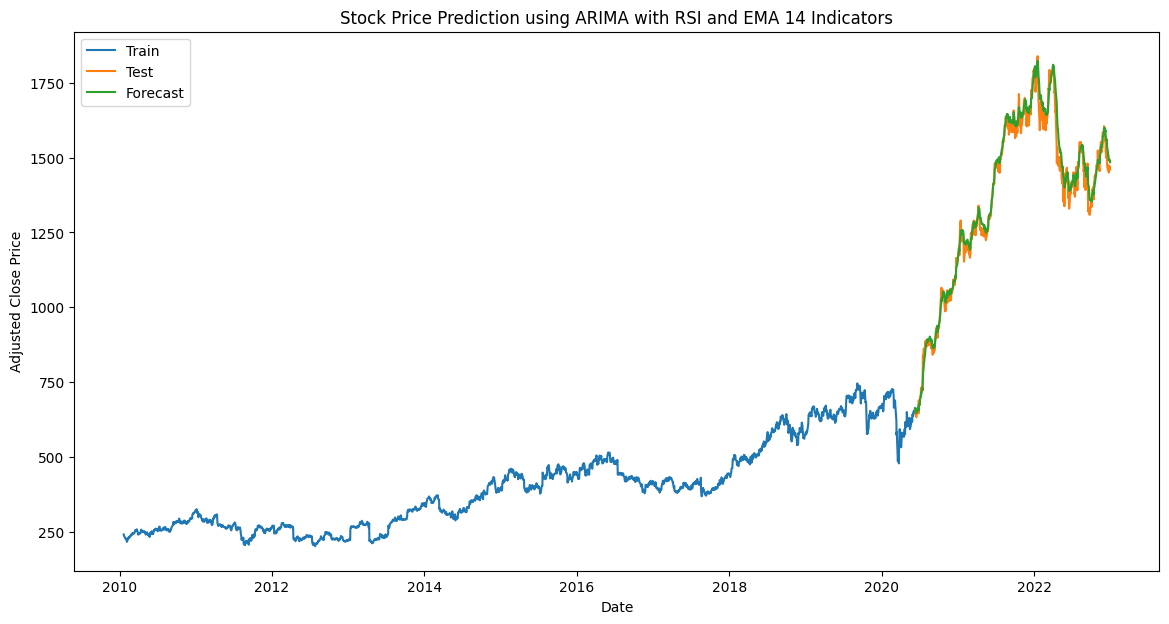

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Adj Close'], label='Train')
plt.plot(test.index, test['Adj Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Stock Price Prediction using ARIMA with RSI and EMA 14 Indicators')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
mae = mean_absolute_error(test['Adj Close'], forecast)
mse = mean_squared_error(test['Adj Close'], forecast)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 21.973788371255164
Mean Squared Error (MSE): 942.4078559464933
Root Mean Squared Error (RMSE): 30.698662119813843
